# Regression model to predict GDP per capita

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
dados = pd.read_csv(r'countries of the world.csv', sep=',')

In [3]:
dados.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Tranforming data

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [3]:
for x in dados.iloc[:,2:].select_dtypes('object').columns:
    dados[x] = dados[x].str.replace('[A-Za-z]', '').str.replace(",", ".").astype(float)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8628/2457510047.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dados[x] = dados[x].str.replace('[A-Za-z]', '').str.replace(",", ".").astype(float)


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [8]:
for x in dados.select_dtypes('float64').columns:
    dados[x].fillna(dados[x].mean(), inplace=True)

In [9]:
dados

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


## Esploratory analysis

Text(0.5, 1.0, 'Correlation HeatMap')

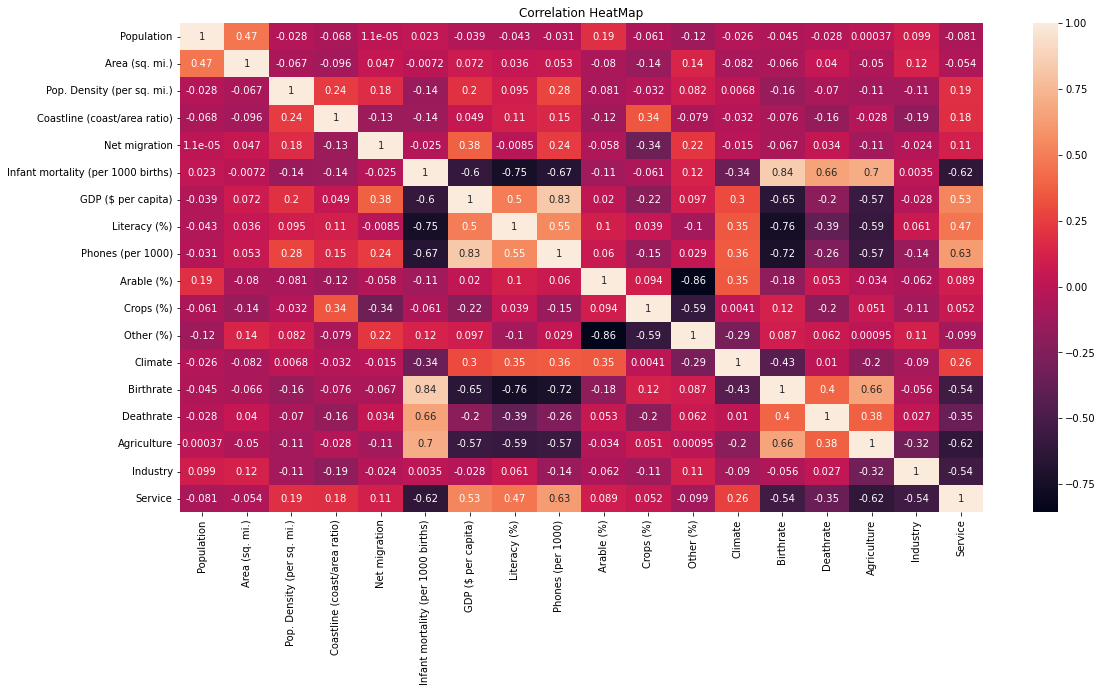

In [13]:
ax, fig = plt.subplots(figsize =(18,9))
sns.heatmap(dados.corr(), annot = True)
plt.title("Correlation HeatMap")

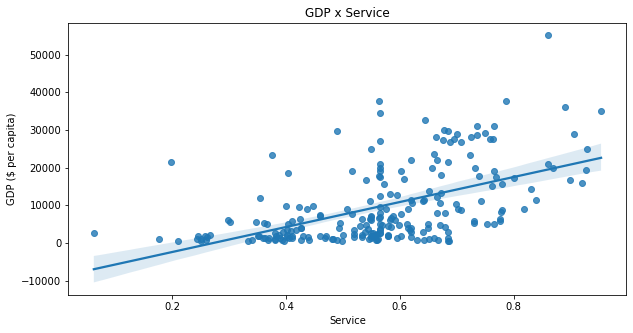

In [18]:
plt.subplots(figsize=(10,5))
sns.regplot(data=dados, x='Service', y='GDP ($ per capita)',)
plt.title("GDP x Service")
plt.show()

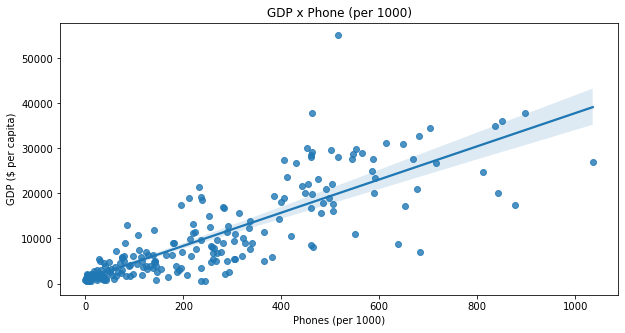

In [20]:
plt.subplots(figsize=(10,5))
sns.regplot(data=dados, x='Phones (per 1000)', y='GDP ($ per capita)',)
plt.title("GDP x Phone (per 1000)")
plt.show()

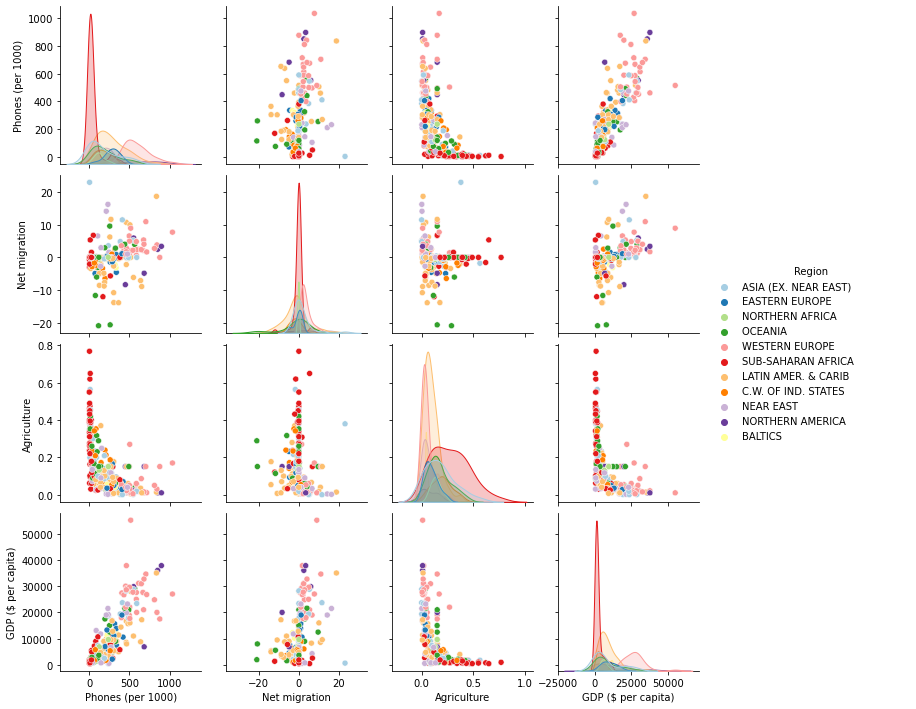

In [26]:
z = dados.loc[:,["Region", "Phones (per 1000)", "Net migration", "Agriculture", "GDP ($ per capita)"]]
sns.pairplot(z, hue="Region", palette="Paired")

## Creating endog and exog variables

In [21]:
import statsmodels.formula.api as sm
from statsmodels.regression import linear_model
import statsmodels.api as api

In [24]:
x = dados.loc[:, ["Phones (per 1000)", "Net migration", "Agriculture"]]
y = dados.loc[:, ["GDP ($ per capita)"]]
x = api.add_constant(x)

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
modelo = linear_model.OLS(endog=y, exog=x).fit()

In [28]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     212.5
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           4.20e-65
Time:                        23:06:36   Log-Likelihood:                -2259.7
No. Observations:                 227   AIC:                             4527.
Df Residuals:                     223   BIC:                             4541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4000.2700    857.41

$$ GDP \ Per \ Capita = 4000.2700 +  30.8886 X_{1i} + 411.4091 X_{2i} - 10720.00  X_{3i} $$